## <font color='yellow'> Sleep Health.</font>

###The Sleep Health and Lifestyle Dataset has 400 rows and 13 columns, covering variables like sleep duration, quality, physical activity, stress levels, and more.
###We'll use the "Sleep_health.csv" for our machine learning classification analysis.

In [1]:

import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


#### Importing Libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## <font color='yellow'> 1. Importing Dataset. </font>

#### Here we are reading the database using the name "df" in the variable.

In [3]:
df = pd.read_csv('sample_data/sleep_data.csv') # Please upload the .csv file in sample_data folder

#### Here we can see that we have categorical and continuous variables, we can also see that we don't have null values.
- Person ID: An identifier for each individual.
- Gender: The gender of the person (Male/Female).
- Age: The age of the person in years.
- Occupation: The occupation or profession of the person.
- Sleep Duration (hours): The number of hours the person sleeps per day.
- Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
- Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
- Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
- BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
- Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
- Heart Rate (bpm): The resting heart rate of the person in beats per minute.
- Daily Steps: The number of steps the person takes per day.
- Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

In [4]:
df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [7]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [8]:
(df.isnull().sum()/len(df))

Person ID                  0.0
Gender                     0.0
Age                        0.0
Occupation                 0.0
Sleep Duration             0.0
Quality of Sleep           0.0
Physical Activity Level    0.0
Stress Level               0.0
BMI Category               0.0
Blood Pressure             0.0
Heart Rate                 0.0
Daily Steps                0.0
Sleep Disorder             0.0
dtype: float64

## <font color='yellow'> 2.Building models. </font>

#### Here we will remove the Person ID variable that will not be used in the models.|

In [9]:
df = df.drop('Person ID', axis = 1)

#### OneHot Label Encoder

In [10]:
hot = pd.get_dummies(df[['Gender', 'Occupation', 'BMI Category', 'Blood Pressure']])
df = pd.concat([df, hot], axis = 1)
df = df.drop(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure'], axis = 1)

#### Separating into features variables and target variable.

In [11]:
X = df.drop('Sleep Disorder', axis = 1)
X = X.values
y = df['Sleep Disorder']

#### StandardScaler
- Here we will use StandardScaler to put our data in the same scale.

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

#### Transforming Data into Train e Test, here we will use 30% of our data to test the machine learning models.

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

#### Naive Bayes
- Running Gaussian Model.
- Here we will use the Naive Bayes Model, we will test Gaussian model, using our Normal Data.

#### Here in our first model we had a very poor result, only 53% accuracy, although it managed to predict very well only people who have a problem, it had a very bad result in predicting people who do not.

0.5309734513274337

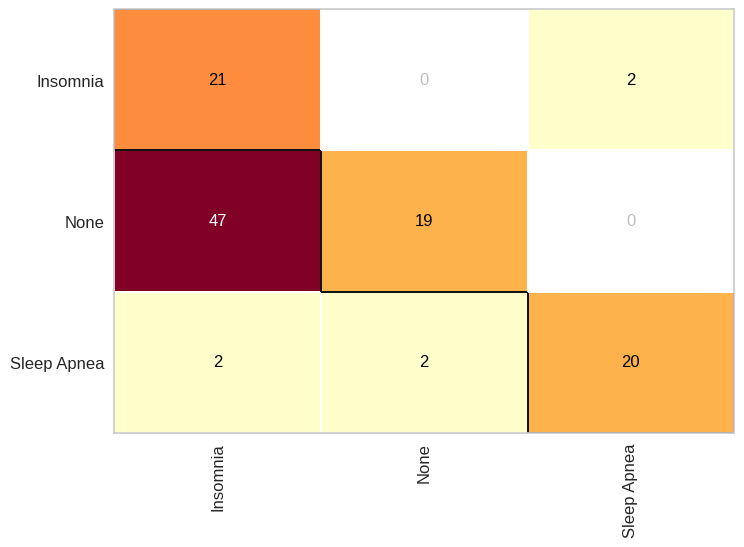

In [14]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [15]:
classification_naive_gaussian = (classification_report(y_test, previsoes))
print(classification_naive_gaussian)

              precision    recall  f1-score   support

    Insomnia       0.30      0.91      0.45        23
        None       0.90      0.29      0.44        66
 Sleep Apnea       0.91      0.83      0.87        24

    accuracy                           0.53       113
   macro avg       0.70      0.68      0.59       113
weighted avg       0.78      0.53      0.53       113



In [16]:
score_naive_gaussian = cm.score(X_test, y_test)

#### Decision Tree
- Here we will use the Decision Tree Model, we will test Entropy and Gini calculations.
- Here we are applying GridSearch to check which are the best metrics to use.

In [17]:
parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = DecisionTreeClassifier()
gridDecisionTree = RandomizedSearchCV(model, parameters, cv = 3, n_jobs = -1)
gridDecisionTree.fit(X_train, y_train)

print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  4
Max Nvl:  4
Algorithm:  entropy
Score:  0.8812260536398467


#### Running Decision Tree.

#### Now in our decision tree model we had a very big improvement when compared to Naive Bayes, we had 89.38% accuracy with the model being able to predict the 3 classes very well.

0.8938053097345132

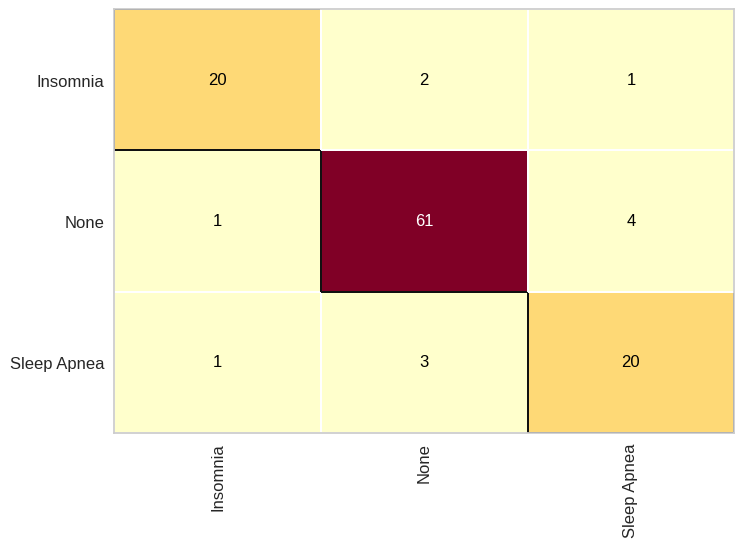

In [18]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 6, max_depth= 6, random_state=0)
decision_tree.fit(X_train, y_train)
previsoes = decision_tree.predict(X_test)

cm = ConfusionMatrix(decision_tree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [19]:
classification_decision = (classification_report(y_test, previsoes))
print(classification_decision)

              precision    recall  f1-score   support

    Insomnia       0.91      0.87      0.89        23
        None       0.92      0.92      0.92        66
 Sleep Apnea       0.80      0.83      0.82        24

    accuracy                           0.89       113
   macro avg       0.88      0.88      0.88       113
weighted avg       0.89      0.89      0.89       113



In [20]:
score_tree = cm.score(X_test, y_test)
print(score_tree)

0.8938053097345132


#### Checking the most important variables of the model.

In [21]:
columns = df.drop('Sleep Disorder', axis = 1).columns
feature_imp = pd.Series(decision_tree.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

BMI Category_Normal                0.450011
Physical Activity Level            0.227875
Age                                0.109282
BMI Category_Normal Weight         0.090082
Sleep Duration                     0.041911
Stress Level                       0.038346
Blood Pressure_142/92              0.017656
Occupation_Teacher                 0.013466
Occupation_Lawyer                  0.005720
Occupation_Engineer                0.002862
Quality of Sleep                   0.002789
Gender_Female                      0.000000
Blood Pressure_130/85              0.000000
Blood Pressure_122/80              0.000000
Blood Pressure_125/80              0.000000
Blood Pressure_125/82              0.000000
Blood Pressure_126/83              0.000000
Blood Pressure_128/84              0.000000
Blood Pressure_128/85              0.000000
Blood Pressure_129/84              0.000000
Blood Pressure_130/86              0.000000
Blood Pressure_120/80              0.000000
Blood Pressure_131/86           

#### RandomForest
- Here we will use the Random Forest Model, we will test Entropy and Gini calculations.
- Applying GridSearch

In [22]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = RandomForestClassifier()
gridRandomForest = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridRandomForest.fit(X_train, y_train)

print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Algorithm:  gini
Score:  0.9040638606676342
Mín Split:  5
Max Nvl:  11


#### Running Random Forest.

#### Here in the Random Forest model we managed to improve even more, we obtained 90.26% accuracy.

0.9026548672566371

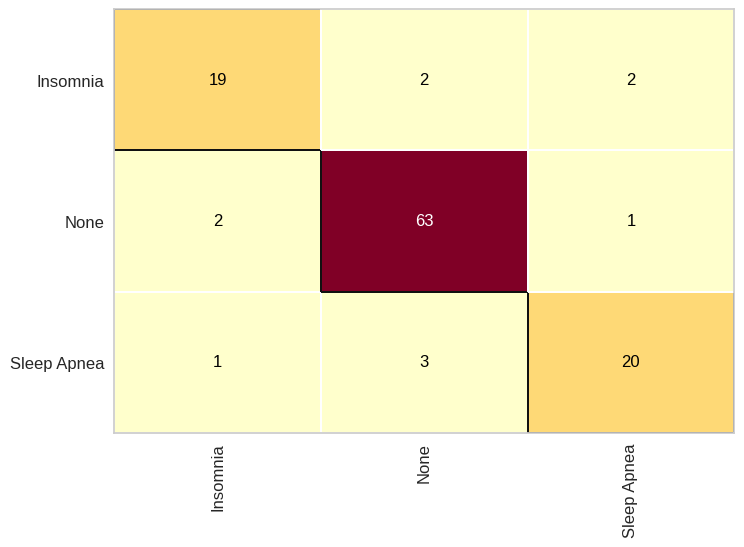

In [23]:
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 5, max_depth= 5,  criterion = 'gini', random_state = 0)
random_forest.fit(X_train, y_train)
previsoes = random_forest.predict(X_test)

cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [24]:
classification_random = (classification_report(y_test, previsoes))
print(classification_random)

              precision    recall  f1-score   support

    Insomnia       0.86      0.83      0.84        23
        None       0.93      0.95      0.94        66
 Sleep Apnea       0.87      0.83      0.85        24

    accuracy                           0.90       113
   macro avg       0.89      0.87      0.88       113
weighted avg       0.90      0.90      0.90       113



In [25]:
score_random = cm.score(X_test, y_test)

#### Checking the most important variables of the model.

In [26]:
feature_imp_random = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

BMI Category_Normal                0.131351
BMI Category_Overweight            0.130821
Blood Pressure_140/95              0.092496
Age                                0.086894
Sleep Duration                     0.073755
Occupation_Nurse                   0.060407
Physical Activity Level            0.055393
Heart Rate                         0.049097
Daily Steps                        0.048757
Stress Level                       0.041599
Quality of Sleep                   0.030586
Occupation_Salesperson             0.026217
Blood Pressure_135/90              0.025475
Blood Pressure_130/85              0.020394
Gender_Male                        0.015391
Blood Pressure_125/80              0.014591
Occupation_Doctor                  0.013854
Occupation_Engineer                0.012983
Occupation_Teacher                 0.012427
Gender_Female                      0.011748
BMI Category_Normal Weight         0.008467
BMI Category_Obese                 0.006766
Blood Pressure_120/80           

#### Logistic Regression
- Here we will use the Linear Regression Model.

#### We managed to get an even better result, here in the Logistic Regression model we had 91.11% accuracy.

0.911504424778761

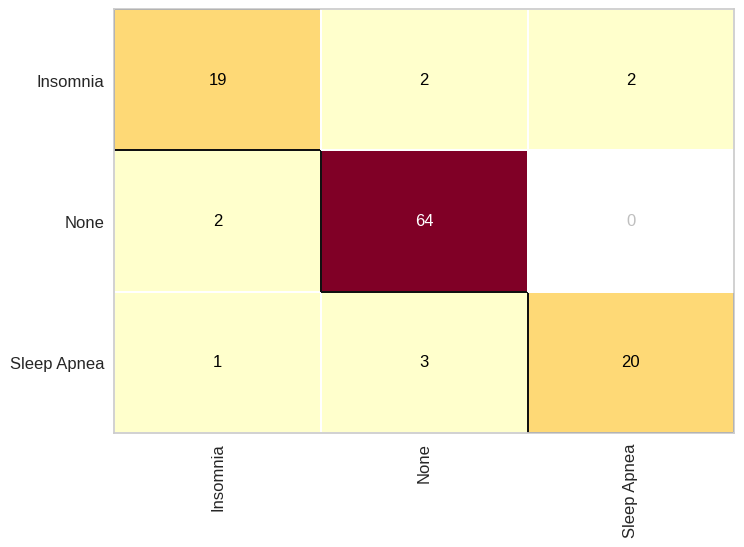

In [27]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 1, max_iter=10000)
logistic.fit(X_train, y_train)
previsoes = logistic.predict(X_test)

cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [28]:
logistic_normal = (classification_report(y_test, previsoes))
print(logistic_normal)

              precision    recall  f1-score   support

    Insomnia       0.86      0.83      0.84        23
        None       0.93      0.97      0.95        66
 Sleep Apnea       0.91      0.83      0.87        24

    accuracy                           0.91       113
   macro avg       0.90      0.88      0.89       113
weighted avg       0.91      0.91      0.91       113



In [29]:
logistic_normal = cm.score(X_test, y_test)
print(logistic_normal)

0.911504424778761


#### Checking the results.

In [30]:
Naive_dict_v1 = {'Model':'Naive Bayes',
               'Scaling':'Normal Data',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian}

Decision_dict = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_tree}

Random_dict = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_random}

Logistic_dict_v1 = {'Model':'Logistic Regression',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':logistic_normal}


resume = pd.DataFrame({'Naive Bayes':pd.Series(Naive_dict_v1),
                       'Decision Tree':pd.Series(Decision_dict),
                       'Random Forest':pd.Series(Random_dict),
                       'Logistic Regression':pd.Series(Logistic_dict_v1),
                      })

resume

,Naive Bayes,Decision Tree,Random Forest,Logistic Regression
Model,Naive Bayes,Decision Tree,Random Forest,Logistic Regression
Scaling,Normal Data,Normal Data,Normal Data,Normal Data
Type,Gaussian,Gini,Gini,-
Precision,0.530973,0.893805,0.902655,0.911504


## <font color='yellow'> 3. Conclusion. </font>

#### Our database is limited, containing only 374 data points with 13 columns. However, the self-explanatory nature of the data has been beneficial, avoiding complications due to the scarcity of data. Moreover, the absence of null values eliminated the need for data treatment.

#### In our Machine Learning models, the data effectively explained the target variable. Most models performed well, with the Logistic regression model standing out, achieving 91.15% accuracy..

#### The most important variables when we look inside the Machine Learning models we can define that they were BMI, Age and Physical Activity Level.